# III. Labor - IFS fraktálok

<div style="background :Red; padding: 1%!important;" >
    
A házi feladatokat <b>fel kell tölteni és be is kell mutatni</b> a Canvas-en megjelenő határidőig.  <br>
A feltöltendő fájl neve: <code>L3_azonosító.ipynb</code>.  <br>
Elérhető maximális pontszám <code>10+2</code>. <br>
<b>A megoldáshoz egy új notebookot hozz létre!</b>

Segédanyag: https://www.youtube.com/watch?v=ZVZQweOHrRM

In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import Math
plt.ion();

## A Sierpiński háromszög
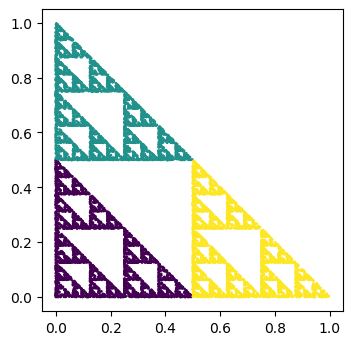

## IFS (Iterated Function System) 

Egy módszer, amely segítségével fraktálokat generálhatunk. A módszer lényege a következő:   
- Legyen $P_0$ egy pont, $N\in\mathbb{N}^*$ és $F_1, F_2,\dots, F_k$ egy-egy transzformáció (olyan függvény, amelyek egy pontnak egy pontot feleltet meg).
- Minden $i\in\{1,2,\dots,N\}$ esetén véletlenszerűen választunk egy $F$ transzformációt az $F_1, F_2,\dots, F_k$ transzformációk közül és legyen $P_i=F(P_{i-1})$.
- A kapott $P_1, P_2, \dots, P_N$ pontokat ábrázoljuk és aszerint színezzük ki, hogy melyik transzformációból keletkeztek. 
    
A különböző színű pontok a fraktál **önhasonló** részeit adják meg.     

## 1. Affin transzformációkkal generált IFS fraktálok

### 1.1 Affin transzformációk (2D eset)

Az affin transzformáció gyakorlatilag egy lineáris transzformáció és egy eltolás, amit a következő mátrixegyenlettel adhatunk meg:

$ F\begin{pmatrix} 
    x\\
    y\\
\end{pmatrix}=\begin{pmatrix}
    a & b\\
    c & d
\end{pmatrix}\cdot\begin{pmatrix}
    x\\
    y\\
\end{pmatrix}+\begin{pmatrix}
    e\\
    f\\
\end{pmatrix}.$

Magát a függvényrendszert az alábbihoz hasonló táblázattal szokás megadni.
$\begin{array}{|c|c|c|c|c|c|c|c|}
\hline
& a & b & c & d & e & f & p\\\hline
F_1 & & & & & & & \\\hline
F_2 & & & & & & & \\\hline
\vdots & & & & & & & \\\hline
F_k & & & & & & & \\\hline
\end{array}$

Itt $p$ annak a valószínűsége, hogy a megfelelő függvényt választjuk.

In [3]:
# EZEK KÓDOK NEM SZÜKSÉGESEK A HÁZI FELADATOK MEGOLDÁSÁHOZ
def affine_update(ax,a,b,c,d,e,f):
    ax.cla()
    ax.set_aspect('equal', 'box')             
    ax.set_xlim((-5.5, 5.5))
    ax.set_ylim((-5.5, 5.5))
    pts = np.array([[-1,-1],[-1,1],[1,1],[1,-1]])    # egy négyzet négy csúcsa
    mat = np.array([[a,b],[c,d]])                    # a lineáris transzformáció mátrixa
    vec = np.array([e,f])                            # eltolási vektor
    newpts = np.matmul(pts,mat)+vec
    ax.fill(newpts[:,0],newpts[:,1],'b')
    
def affine_demo():
    fig1, ax1 = plt.subplots()
    a = widgets.IntSlider(1,-5,5,description='a')  
    b = widgets.IntSlider(0,-5,5,description='b')
    c = widgets.IntSlider(0,-5,5,description='c')
    d = widgets.IntSlider(1,-5,5,description='d')
    e = widgets.IntSlider(0,-5,5,description='e')
    f = widgets.IntSlider(0,-5,5,description='f')
    widgets.interact(affine_update,ax=widgets.fixed(ax1),a=a,b=b,c=c,d=d,e=e,f=f)

def print_2D_affine_table(data,name):
    display(Math(r'\begin{array}{|c|c|c|c|c|c|c|c|}\hline {\bf{'+str(name)+r'}} & a & b & c & d & e & f & p\\\hline '+
    r'\\\hline '.join([r'F_{} & '.format(ind+1)+' & '.join([f'{cell:.4f}' for cell in row]) for (ind,row) in enumerate(data)])+
    r'\\\hline\end{array}'))

In [4]:
# EZEK KÓDOK KELLENEK AZ ELSŐ HÁZI FELADAT MEGOLDÁSÁHOZ

serp_data = [[0.5, 0, 0, 0.5, 0, 0, 1/3],
    [0.5, 0, 0, 0.5, 0, 0.5, 1/3],
    [0.5, 0, 0, 0.5, 0.5, 0, 1/3]]

spleenworth_data = [[0.00, 0.00, 0.00, 0.16, 0.00, 0.00, 0.01],
    [0.85, 0.04, -0.04, 0.85, 0.00, 1.60, 0.85],
    [0.20, -0.26, 0.23, 0.22, 0.00, 1.60, 0.07],
    [-0.15, 0.28, 0.26, 0.24, 0.00, 0.44, 0.07]]

maple_data = [[0.43, 0.52, -0.45, 0.50, 1.49, -0.75, 0.31],
   [0.45, -0.49, 0.47, 0.47, -1.62, -0.74, 0.31],
   [0.49, 0.00, 0.00, 0.51, 0.02, 0.80, 0.31],
   [0.14, 0.01, 0.00, 0.51, -0.08, -1.31, 0.07]]

crystal_data = [[0.382, 0, 0, 0.382, 0.3072, 0.619, 0.2],
    [0.382, 0, 0, 0.382, 0.6033, 0.4044, 0.2],
    [0.382, 0, 0, 0.382, 0.0139, 0.4044, 0.2],
    [0.382, 0, 0, 0.382, 0.1253, 0.0595, 0.2],
    [0.382, 0, 0, 0.382, 0.492, 0.0595, 0.2]]

tree_data = [[0.195, -0.488, 0.344, 0.443, 0.4431, 0.2452, 0.2],
   [0.462, 0.414, -0.252, 0.361, 0.2511, 0.5692, 0.2],
   [-0.058, -0.07, 0.453, -0.111, 0.5976, 0.0969, 0.2],
   [-0.035, 0.07, -0.469, -0.022, 0.4884, 0.5069, 0.2],
   [-0.637, 0, 0, 0.501, 0.8662, 0.2513, 0.2]]

interactive(children=(IntSlider(value=1, description='a', max=5, min=-5), IntSlider(value=0, description='b', …

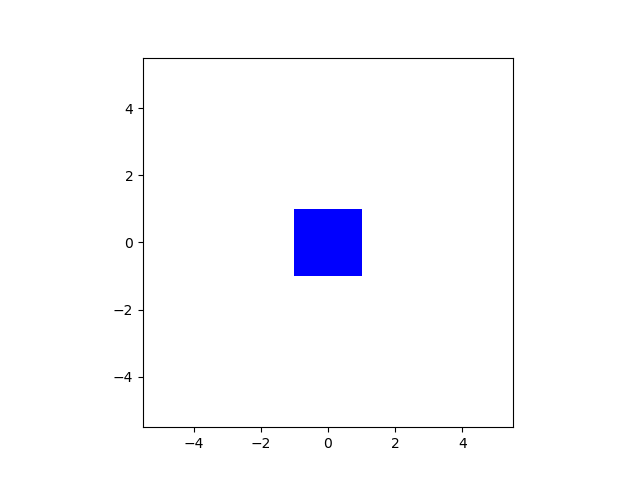

In [5]:
affine_demo()

### 1.2. Speciális transzformációs mátrixok

- Skálázás: $\begin{pmatrix}
    s_1 & 0\\
    0 & s_2
\end{pmatrix},$ ahol $s_1,s_2\in\mathbb{R}$.

- Nyírás: $\begin{pmatrix}
    1 & r\\
    0 & 1
\end{pmatrix},$ ahol $r\in\mathbb{R}$.

- Origó körüli forgatás $\varphi$ szöggel: 
$\begin{pmatrix}
    \cos \varphi & -\sin \varphi\\
    \sin \varphi & \cos \varphi
\end{pmatrix},$ ahol $\varphi\in[0,2\pi)$.


### 1.3. Példa: A Sierpiński háromszög

A generáló függvényrendszer táblázata a következő.

In [6]:
print_2D_affine_table(serp_data,'Sierpiński')

<IPython.core.display.Math object>

A $(0,0)$ kezdőpontból indított $10000$ iterációval generált Sierpiński háromszög az alábbi ábrán látható.

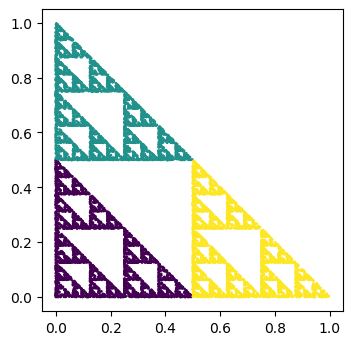

<h3 style="background :Red; padding: 1%!important;"> 1. Házi feladat. (4 pont)</h3>

Írj egy függvényt, ami egy ami egy $k\times 7$-es listával megadott kétdimenziós, affin függvényrendszer alapján generál egy a $(0,0)$ kezdőpontból indított $10000$ iterációs IFS fraktált! A megírt függvény felhasználásával generáld az alábbi öt táblázatnak megfelelő fraktált!

In [6]:
print_2D_affine_table(serp_data,'Sierpiński')

<IPython.core.display.Math object>

In [7]:
print_2D_affine_table(spleenworth_data,'Páfrány')

<IPython.core.display.Math object>

In [8]:
print_2D_affine_table(maple_data,'Juharlevél')

<IPython.core.display.Math object>

In [9]:
print_2D_affine_table(crystal_data,'Hópehely')

<IPython.core.display.Math object>

In [10]:
print_2D_affine_table(tree_data,'Fa')

<IPython.core.display.Math object>

<h3 style="background :Red; padding: 1%!important;"> 2. Házi feladat. (2 pont)</h3> 

Generáld ki az alábbi Sierpiński négyzetet $10000$ iterációval az origóból indulva! Találd meg a szükséges transzformációs táblázatot és írasd ki azt!

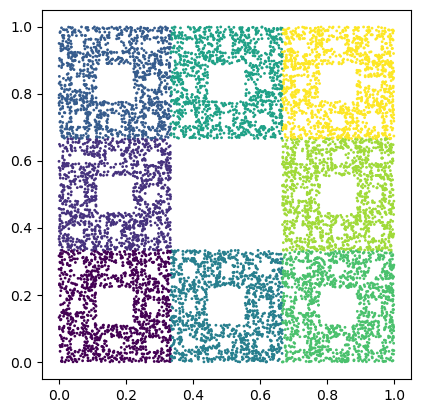

### 1.4. Affin transzformációk (3D eset)

Egy térbeli affin transzformáció általános alakja
$$
F\begin{pmatrix}
    x\\
    y\\
    z
\end{pmatrix}=
\begin{pmatrix}
    a_{11} & a_{12} & a_{13}\\
    a_{21} & a_{22} & a_{23}\\
    a_{31} & a_{32} & a_{33}
\end{pmatrix}\cdot
\begin{pmatrix}
    x\\
    y\\
    z
\end{pmatrix}+
\begin{pmatrix}
    b_1\\
    b_2\\
    b_3
\end{pmatrix}.$$

A függvényrendszert egy $k$ soros és $13$ oszlopos táblázat segítségével adhatjuk meg.

<h3 style="background :Red; padding: 1%!important;"> 3. Házi feladat. (+2 pont)</h3>

Az alábbi ábrán látható Sierpiński gúla alapja egy $2$ oldalhosszúságú négyzet, magassága $1$.</br> Generáld ki a gúlát $10000$ iterációval az origóból indulva és írasd ki a megfelelő transzformációs táblázatot! </br> **Fontos:** A kapott gúla mérete és pozíciója **pontosan** kell egyezzen az alábbi ábrán láthatóéval!

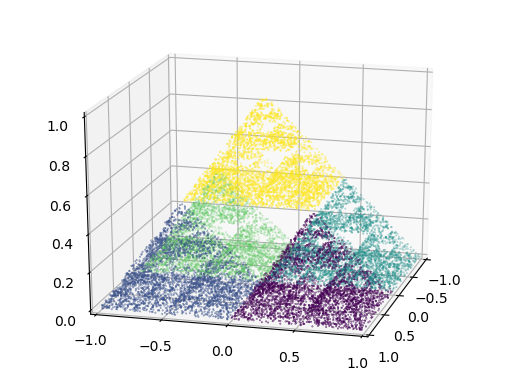

## 2. Möbius transzformációkkal generált IFS fraktálok

### 2.1 Möbius transzformációk

A Möbius transzformációk egy komplex számnak egy másik komplex számot feleltetnek meg és alakjuk a következő:
$$T(z)=\frac{\alpha z+\beta}{\gamma z+\delta},$$
ahol $\alpha,\beta,\gamma,\delta\in\mathbb{C}$ és  $\alpha\delta - \beta\gamma\ne 0$. 

A függvények együtthatóit itt is táblázatban szokás tárolni:

\begin{array}{|c|c|c|c|c|c|}
\hline
& \alpha & \beta & \gamma & \delta & p\\\hline
F_1 & & & & & \\\hline
F_2 & & & & & \\\hline
\vdots & & & & & \\\hline
F_k & & & & & \\\hline
\end{array}

In [7]:
# EZEK KÓDOK NEM SZÜKSÉGESEK A HÁZI FELADATOK MEGOLDÁSÁHOZ
def moebius_update(ax, av, ak, bv, bk, cv, ck, dv, dk):
    ax.cla()
    ax.set_aspect('equal', 'box')             
    ax.set_xlim((-5.5, 5.5))
    ax.set_ylim((-5.5, 5.5))
    a = complex(av,ak)
    b = complex(bv,bk)
    c = complex(cv,ck)
    d = complex(dv,dk)
    x,y = np.array(np.meshgrid(np.linspace(-1,1,20), np.linspace(-1, 1, 20)));
    complexPts = list(map(lambda z: (a*z+b)/(c*z+d),x.ravel()+1j*y.ravel()))
    xPts = np.real(complexPts)
    yPts = np.imag(complexPts)
    ax.plot(xPts,yPts,'bo', markersize=1)
    
def moebius_demo():
    fig2, ax2 = plt.subplots()
    av = widgets.IntSlider(1,-5,5,description='Re(a)')
    ak = widgets.IntSlider(0,-5,5,description='Im(a)')
    bv = widgets.IntSlider(0,-5,5,description='Re(b)')
    bk = widgets.IntSlider(0,-5,5,description='Im(b)')
    cv = widgets.IntSlider(0,-5,5,description='Re(c)')
    ck = widgets.IntSlider(0,-5,5,description='Im(c)')
    dv = widgets.IntSlider(1,-5,5,description='Re(d)')
    dk = widgets.IntSlider(0,-5,5,description='Im(d)')
    widgets.interact(moebius_update,ax=widgets.fixed(ax2),av=av,ak=ak,bv=bv,bk=bk,cv=cv,ck=ck,dv=dv,dk=dk)
    
def print_2D_mobius_table(data,name):
    display(Math(r'\begin{array}{|c|c|c|c|c|c|}\hline {\bf{'+str(name)+r'}} & \alpha & \beta & \gamma & \delta & p\\\hline '+
    r'\\\hline '.join([r'F_{} & '.format(ind+1)+' & '.join([f'{cell:.4f}' for cell in row]) for (ind,row) in enumerate(data)])+
    r'\\\hline\end{array}'))

In [8]:
# EZEK KÓDOK KELLENEK AZ ELSŐ HÁZI FELADAT MEGOLDÁSÁHOZ
    
ap_tri_data=[[1+np.sqrt(3),2+np.sqrt(3),-2-np.sqrt(3),5+3*np.sqrt(3),1/3],
    [(-1+1j*np.sqrt(3))*(1+np.sqrt(3)),(-1+1j*np.sqrt(3))*(2+np.sqrt(3)),-4-2*np.sqrt(3),10+6*np.sqrt(3),1/3],
    [(-1-1j*np.sqrt(3))*(1+np.sqrt(3)),(-1-1j*np.sqrt(3))*(2+np.sqrt(3)),-4-2*np.sqrt(3),10+6*np.sqrt(3),1/3]]

ap_circ_data=[[2.73,3.73,-3.73,10.2,1/3],
    [3.73-6.46j,-10.2+17.66j,5.46,7.46,1/3],
    [3.73+6.46j,-10.2-17.66j,5.46,7.46,1/3]]

interactive(children=(IntSlider(value=1, description='Re(a)', max=5, min=-5), IntSlider(value=0, description='…

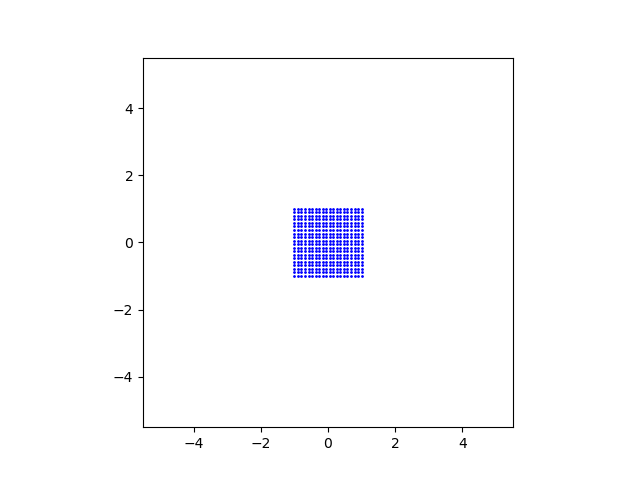

In [9]:
moebius_demo()

<h3 style="background :Red; padding: 1%!important;"> 4. Házi feladat. (4 pont)</h3>

Generáld ki az alábbi két táblázattal megadott Apollóniusz háromszöget, illetve korongot $10000$ iterációval az origóból indulva!

In [14]:
print_2D_mobius_table(ap_tri_data,'Ap. háromszög')

<IPython.core.display.Math object>

In [15]:
print_2D_mobius_table(ap_circ_data,'Ap. korong')

<IPython.core.display.Math object>

Az alábbi ábrákhoz hasonló ábrákat kellene kapj.

|  |  |
|--|--|
|![image4]( 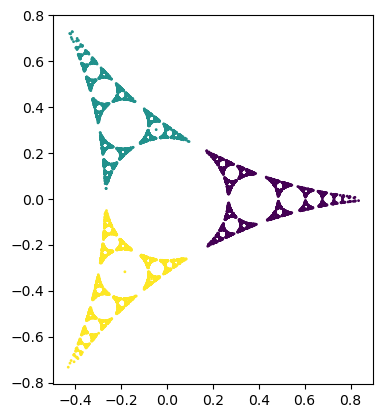)| 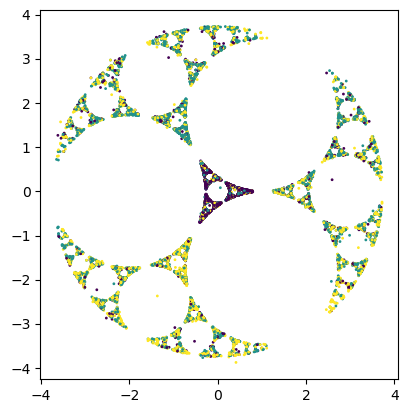|